# Linear Regression Notebook

#### This is an exercise exploring regression using sklearn's diabetes dataset

## Building our linear regression model

#### A linear regression model has the general formula $$ Y_i = \mathbf{w}^T\mathbf{x_i} + \epsilon_i, \quad \mathbf{\epsilon_i} \sim \mathcal{N} \big(0, \ \mathbf{\sigma}^2\big)$$

#### where $\epsilon_i$ is a random variable that follows the normal distribution with mean $0$ and variance $\sigma^2$, which in turn means that $Y_i$ is a random variable also, that depends on the value of $X = x$, such that the conditional distribution of $y$ is given by $$p \big(y \ | \ \mathbf{x}, \mathbf{w} \big) = \mathcal{N} \big( y \ | \ \mathbf{w}^T\mathbf{x}, \ \mathbf{\sigma}^2\big)$$

#### If we consider a dataset, similar to what we have here, such that $\mathbf{X_{i}} =\{\mathbf{1}, \mathbf{x_1}, \mathbf{x_2}, ..., \mathbf{x_N}\}$, where for our diabetes dataset, each $\mathbf{X_i} \in \mathbf{R}^{1 \times 11}$ represents a patient where each column represents one of $10$ metrics related to the patients health (e.g., age, BMI etc) which have been recorded plus a $1$ in the first column for the intercept. 

#### One key assumption we make is that the noise parameter follows a gaussian distribution with a mean, $\mathbf{\mu} = \mathbf{0}$ and variance given by $\mathbf{\sigma}^2$ and they are assumed the be independent and identically distributed. This means that the covariance terms, $\mathrm{cov}(\epsilon_i, \epsilon_k)$ in the covariance matrix, $\mathbf{\Sigma}$, are zero, i.e., the matrix looks like this 

$$ \mathbf{\Sigma} = \begin{pmatrix}
\sigma^2 & . & . & . & 0\\
. & \sigma^2 & . & . & .\\
. & . & \sigma^2 & . & .\\
. & . & . & \sigma^2 & .\\
0 & . & . & . & \sigma^2\\
\end{pmatrix}, \quad \mathbf{\Sigma} \in \  \mathbf{R}^{N \times N}$$


## Parameter Estimation

#### Our linear regression model is specified by several, as yet, unknown parameters, namely $\mathbf{w}$ and $\sigma^2$, where 

$$\begin{align}
\mathbf{w} = \{\alpha, w_1, ..., w_n\} \\[10pt]
\end{align}$$

#### meaning that the unknown parameters we must estimate are $\alpha$, $\{ \mathbf{w_i}, .., \mathbf{w_n} \}$ and $\sigma^2$. One way that we can do this is through maximum likelihood estimation, where we must first formalize the likelihood function, which is a joint probability density function of the parameters over the observed data. As our model follows the gaussian distribution, we know our likelihood function will also be gaussian

$$ {L}\big(y \ | \ \mathbf{w}, \sigma^2 \big) = p \big(y_1, y_2, ..., y_n | x_1, x_2, ..., x_n, \mathbf{w} \big)\ \sim \mathcal{N}\Big(\mathbf{\mu}, \ \mathbf{\Sigma} \Big)$$

#### Because the residual terms are assumed to be iid, this means that the response variables, $y_i$ are conditionally independent, meaning that the joint pdf factorizes 

$$ \begin{align*} p \big(y_1, ..., y_n | x_1, ..., x_n, \mathbf{w} \big) & = \prod_{i = 1}^{n} p \big(y_i \ | \ \mathbf{x_i}, \mathbf{w} \big) \\ 
& = \prod_{i = 1}^{n} \ \mathcal{N} \big( y \ | \ \mathbf{w}^T\mathbf{x}, \ \mathbf{\sigma}^2\big)
\end{align*}$$

#### We often opt to use the log transformation on our likelihood function as it provides some benefits that make them easier to work with. Firstly, working with the sum of gaussian densities makes the computation of the gradient easier, rather than the having to use the chain rule and secondly, is the issue of numerical underflow - the inability to accurately represent the product of very small numbers (in this case probabilities). 

$$ \begin{align} \mathcal{L}\big(y \ | \ \mathbf{w}, \sigma^2 \big) = -\log\Big( \prod_{i = 1}^{n} p \big(y_i \ | \ \mathbf{x_i}, \mathbf{w} \big)\Big) & = -\sum_{i=1}^n \log p \big(y_i \ | \ \mathbf{x_i}, \mathbf{w} \big) \\ & = \sum_{i=1}^n\log{\frac{1}{\sqrt{2\pi}}} - \sum_{i=1}^n \log{\sigma} -\sum_{i=1}^n \frac{1}{2\sigma^2}\big(y_i - \mathbf{w}^T\mathbf{x} \big)^2 \end{align}$$ 

## Maximum Likelihood Estimation

#### As mentioned, one approach to estimating the parameters is Maximum Likelihood Estimation, where we find the parameters, $\hat{\textbf{w}}$ and $\hat{\sigma}^2$, that maximises the likelihood function (or minimizes the negative log likelihood).

#### In the first instance we will estimate the parameter $\mathbf{w}$, which can be defined formally as 

$$
\begin{equation}
\hat{\mathbf{w}}_{ML} = \arg\max_{w} \mathcal{L} \big(y | \mathbf{w} \big)
\end{equation}$$

#### where this means, we want to find the argument of $\mathbf{w}$ that maximizes the log likelihood and in this scenario we have a closed form solution in which we can find a global minimum. 

**Note that for other likelihood functions a closed form solution may not exist and so we would have to find the optimal solution using iterative methods such as gradient ascent (or gradient descent on the negative log likelihood).** 

#### Since the third term in the equation is the only function of $\mathbf{w}$ then it is sufficient to **minimize** this function in order to maximise the log likelihood. To see this, look at the equation for the log likelihood of the multivariate normal distribution and notice that the third term is negative and if we want to maximise $\mathcal{L}\big(y \ | \ \mathbf{w}\big)$ with respect to $\mathbf{w}$, then we need to minimise this term

$$ \begin{align} \mathcal{L}\big(y \ | \ \mathbf{w} \big) = \text{constant} - \text{constant} -\sum_{i=1}^n \frac{1}{2\sigma^2}\big(y_i - \mathbf{w}^T\mathbf{x_i} \big)^2 \end{align}$$ 

#### So in order to minimize this function, we can do this by taking the derivative of the log likelihood with respect to $\mathbf{w}$ and setting this to zero and solving. 

$$ \begin{align}
\mathcal{L}\big(\mathbf{w}\big) & = \frac{1}{2\sigma^2} \sum_{i=1}^n \big(y_i - \mathbf{w}^T \mathbf{x_i} \big)^2 \\[2pt]
                                & = \frac{1}{2\sigma^2} \big(\mathbf{y} - \mathbf{w} \mathbf{X} \big)^T \big(\mathbf{y} - \mathbf{w} \mathbf{X} \big) \\[10pt]
                                & = \frac{1}{2\sigma^2} \Big(\mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{w} \mathbf{X} - \mathbf{X}^T \mathbf{w}^T \mathbf{y} + \mathbf{X}^T \mathbf{w}^T \mathbf{w} \mathbf{X}\Big) \end{align}$$

#### Taking the gradient 

$$ \begin{align}                                
\frac{d\mathcal{L}}{d\mathbf{w}} & = \frac{1}{2\sigma^2} \frac{d}{d\mathbf{w}} \Big(\mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{w} \mathbf{X} - \mathbf{X}^T \mathbf{w}^T \mathbf{y} + \mathbf{X}^T \mathbf{w}^T \mathbf{w} \mathbf{X} \Big)\\[10pt]
& = \frac{1}{2\sigma^2} \Big( -\mathbf{y}^T \mathbf{X} - \mathbf{X}^T \mathbf{y} + 2\mathbf{X}^T \mathbf{w}^T \mathbf{X} \Big) \\[10pt]
& = \frac{1}{2\sigma^2} \Big( -2\mathbf{X}^T \mathbf{y} + 2\mathbf{X}^T \mathbf{X} \mathbf{w} \Big)\\[10pt]
& = \frac{1}{2\sigma^2} \Big( -2\mathbf{X}^T \mathbf{y} + 2\mathbf{X}^T \mathbf{X} \mathbf{w} \Big)\\
\end{align}$$

#### Setting this equal to zero 

$$ \begin{align}                                
\mathbf{0} & = \frac{1}{2\sigma^2} \Big( -2\mathbf{X}^T \mathbf{y} + 2\mathbf{X}^T \mathbf{X} \mathbf{w} \Big)\\[10pt]
\mathbf{X}^T \mathbf{y} & = \mathbf{X}^T \mathbf{X} \mathbf{w} \\[10pt] 
\mathbf{\hat{w}}_{ML}  & = \big(\mathbf{X}^T \mathbf{X}\big)^{-1} \mathbf{X}^T \mathbf{y}
\end{align}$$

#### We then must confirm if the Hessian is a global minimum, which is the case if it is positive definite.

$$ \nabla_{\mathbf{w}}^2 = \mathbf{X}^T \mathbf{X} \in \mathcal{R}^{N \times N}$$ 

#### Which is the case for the matrix $\mathbf{X}^T\mathbf{X}$, meaning that our solution is indeed a global minimum and our solution is valid.

## Computing the OLS estimate of the variance

#### In estimating the variance, we follow the same process as before using the likelihood but obviously we will maximise the likelihood over $\sigma$ instead   

$$
\begin{equation}
\hat{\mathbf{\sigma^2}}_{ML} = \arg\max_{\sigma^2} \mathcal{L} \big(y | \mathbf{\sigma} \big)
\end{equation}
$$

#### Restaing the multivariate pdf to include all terms here

$$ \begin{align}
L\big(\mathbf{\sigma^2}\big) & = \sum_{i=1}^n\log{\frac{1}{\sqrt{2\pi}}} - \sum_{i=1}^n \log{\sigma} -\sum_{i=1}^n \frac{1}
{2\sigma^2}\big(y_i - \mathbf{w}^T\mathbf{x_i} \big)^2 \\[2pt]
& = \sum_{i=1}^n\log{\frac{1}{\sqrt{2\pi}}} - \sum_{i=1}^n \log{\sigma} -\sum_{i=1}^n \frac{1}
{2\sigma^2}\big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big)^T \big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big) \\[2pt]
\end{align}$$

#### Taking the gradient 

$$ \begin{align}                                
\frac{d\mathcal{L}}{d\mathbf{\sigma^2}} & = -\frac{n}{\sigma} + \frac{1}{\sigma^3} \big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big)^T \big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big) \\[10pt] 
0 & = -\frac{n}{\sigma} + \frac{1}{\sigma^3} \big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big)^T \big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big) \\[10pt] 
\hat{\sigma^2} & = \frac{1}{n}\big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big)^T \big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big) \\[10pt]
\end{align}
$$

#### Where $\hat{\sigma^2}$ is the MLE estimate for the variance, but given this is a multivariate regression problem we have to adjust for the degrees of freedom, i.e., the number of predictors (or independent variables). Since we will have 'p' independent variables plus the intercept, then we should correct the denominator by deducting $p + 1$ to get $n - (p + 1)$ resulting in the following formula

$$ \begin{align}                                
\hat{\sigma^2} & = \frac{1}{n - p - 1}\big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big)^T \big(\mathbf{y} - \mathbf{w}^T\mathbf{X} \big) \\[10pt]
\end{align}
$$


## Making Predictions

#### Then for any $\mathbf{X_i}$, the prediction given by our linear regression model is given by $\hat{y}_i$, 

$$ \hat{y}_i  = \mathbf{\hat{w_i}}^T\mathbf{X_i} + \hat{\sigma^2} $$

#### which is referred to as the $i^{th}$ fitted value

## Data Preparation

In [288]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True, scaled=False)

df = diabetes.data 
targets = diabetes.target

df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0
441,36.0,1.0,19.6,71.00,250.0,133.2,97.0,3.00,4.5951,92.0


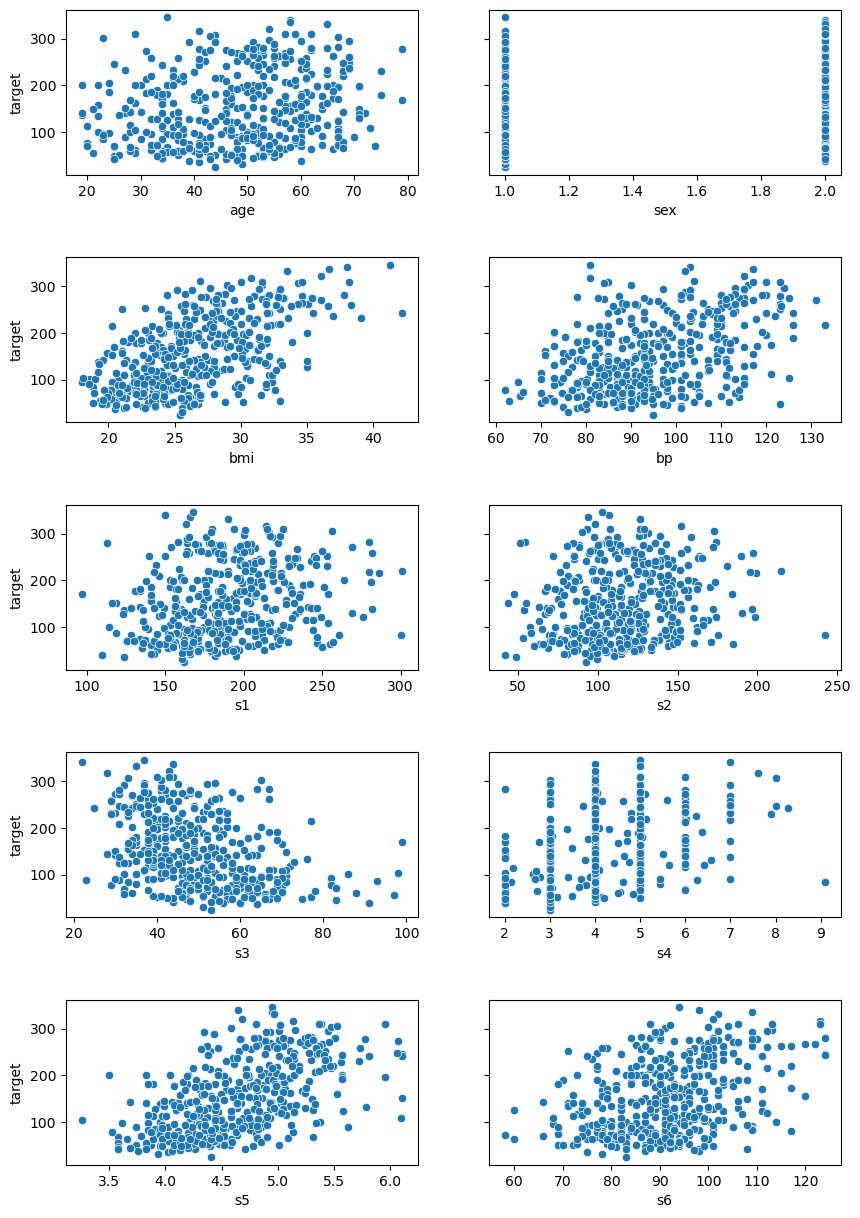

In [290]:
rows = 5
columns = 2

fig, axes = plt.subplots(rows, columns, sharey=True, figsize=(10,15))

sns.scatterplot(ax=axes[0,0], data = df, x='age', y = targets)
sns.scatterplot(ax=axes[0,1], data = df, x='sex', y = targets)
sns.scatterplot(ax=axes[1,0], data = df, x='bmi', y = targets)
sns.scatterplot(ax=axes[1,1], data = df, x='bp', y = targets)
sns.scatterplot(ax=axes[2,0], data = df, x='s1', y = targets)
sns.scatterplot(ax=axes[2,1], data = df, x='s2', y = targets)
sns.scatterplot(ax=axes[3,0], data = df, x='s3', y = targets)
sns.scatterplot(ax=axes[3,1], data = df, x='s4', y = targets)
sns.scatterplot(ax=axes[4,0], data = df, x='s5', y = targets)
sns.scatterplot(ax=axes[4,1], data = df, x='s6', y = targets)
plt.subplots_adjust(hspace=0.5)
plt.show()                   


#### We will normalize the data now
##### Note that we could have done this easily by setting 'scaled = True' in the load_dataset call

In [291]:
def np_mean(array):

    mean = np.sum(array)/len(array)

    return mean 

def np_std(array):

    mean = np_mean(array)
    squared_diff = np.square(array - mean)
    num_variables = len(array)

    std = np.sqrt(np.sum(squared_diff)/len(array))

    return std 

def normalize(array):

    numerator = (array - np_mean(array))
    denominator = np.sqrt(len(array))*np_std(array)

    normalized = numerator/denominator

    return normalized


In [292]:
scaled_df= df.apply(normalize, axis=0)

# It is necessary to insert a column of 1's into the design matrix, our dataframe in this case
# so that we can accurately compute the estimate for the intercept parameter 
scaled_df.insert(0, 'constant',1)

In [293]:
scaled_df

,constant,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,1,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,1,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,1,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,1,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,1,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,1,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,1,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [294]:
# Let's use sklearn to create our training and test data splits 
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df, targets, test_size=0.05, random_state=42)

### We could use sklearn's functionality to run a regression model but we'll do this ourselves using numpy

In [295]:

def compute_coef_(X, Y):

    # We define several variables here which break down the computation of the maximum likelihood weight matrix into smaller components
    
    # X transpose X
    XTX = np.dot(np.transpose(X), X)

    # This is the Moore-Penrose Pseudoinverse 
    X_MP = np.dot(np.linalg.inv(XTX), np.transpose(X))

    # The Maximum Likelihood estimator of the weight matrix is then given by 
    W_ml = np.dot(X_MP, Y)

    return W_ml

def compute_var_(actual_y, coef_, X):

    samples = X.shape[0]
    feats = X.shape[1]

    predicted_vals = np.dot(X, coef_)

    residuals = actual_y - predicted_vals
    residuals_sq = np.sum(residuals**2)
    var_ml = residuals_sq / (samples - feats - 1)
    
    return var_ml 


def compute_t(X, Y, coef_):

    OLS_estimator = compute_coef_(X, Y)
    var_ml = compute_var_(Y, coef_, X)

    denominator = var_ml * np.linalg.inv(np.dot(X.T, X))
                   
    t_stat = OLS_estimator / np.sqrt(denominator.diagonal())
                                      
    return t_stat

In [296]:
# The Maximum Likelihood estimator of the weight matrix is then given by 
W_ml = compute_coef_(X_train, Y_train)

In [297]:
# We have used our training data to compute the optimal weight matrix and now we want to use this to make predictions 
# We want to also evaluate the performance of our regression model using a standardized metric, and we will use the MSE 

y_pred = np.dot(X_test, W_ml) 
MSE = np.square(Y_test - y_pred).mean()
MSE

3516.1108664162216

#### Lets check this against the linear regression model from sklearn 

In [298]:
from sklearn.linear_model import LinearRegression 

reg = LinearRegression(fit_intercept=False).fit(X_train, Y_train)
y_reg_pred = reg.predict(X_test)

In [299]:
np.square(Y_test - y_reg_pred).mean()

3516.11086641624

## Scaling the dataset

#### We can see that the Mean Squared Error using our own implementation and the sklearn library result in the same figure. However, note this was only because we set the 'fit_intercept' parameter is 'False' which prevents the model from pre-processing the data. 

#### Let's see if scaling our features and our target makes a difference to performance - note that we have scaled the features already and this has not had an effect (see the scaled_df variable)

In [300]:
scaled_targets = normalize(targets)

In [301]:
# Let's use sklearn to create our training and test data splits 
X_train, X_test, Y_train_scaled, Y_test_scaled = train_test_split(scaled_df, scaled_targets, test_size=0.05, random_state=42)

In [302]:
# The Maximum Likelihood estimator of the weight matrix is then given by 
W_ml_scaled = compute_coef_(X_train, Y_train_scaled)

In [303]:
# We have used our training data to compute the optimal weight matrix and now we want to use this to make predictions 
# We want to also evaluate the performance of our regression model using a standardized metric, and we will use the MSE 

y_pred_scaled = np.dot(X_test, W_ml_scaled) 
MSE_scaled = np.square(Y_test_scaled - y_pred_scaled).mean()
MSE_scaled

0.0013415103494441253

#### Using the sklearn library now should yield the same thing 

In [304]:
reg_scaled = LinearRegression(fit_intercept=False).fit(X_train, Y_train_scaled)
y_reg_pred_scaled = reg_scaled.predict(X_test)

np.square(Y_test_scaled - y_reg_pred_scaled).mean()

0.0013415103494441316

In [305]:
reg_1 = LinearRegression(fit_intercept=False).fit(scaled_df, targets)
test_1 = reg_1.predict(scaled_df)

np.square(targets - test_1).mean()

reg_1.coef_

array([ 152.13348416,  -10.0098663 , -239.81564367,  519.84592005,
        324.3846455 , -792.17563855,  476.73902101,  101.04326794,
        177.06323767,  751.27369956,   67.62669218])

## Statistical Testing 

#### Lets investigate the independent variables to see which have the greatest predictive power 

In [306]:
from scipy.stats import t

stat_columns = ['feature', 'Coefficient', 't-stat', 'P-Val']

stats_df = pd.DataFrame(columns = stat_columns)

stats_df['feature'] = scaled_df.columns

OLS_estimator = compute_coef_(scaled_df, targets)

stats_df['Coefficient'] = OLS_estimator

OLS_var = compute_var_(targets, OLS_estimator, scaled_df)
t_stats = compute_t(scaled_df, targets, OLS_estimator)

stats_df['t-stat'] = t_stats

# Computing the p-value using the scipy.stats module

# The degrees of freedom required for computing the p-values  
dof = scaled_df.shape[0] - 1

# Uses the scipy.stats module for the t distribution's CDF
p_values = 2 * (1 - t.cdf(np.abs(t_stats), df = dof))

stats_df['P-Val'] = p_values

stats_df

,feature,Coefficient,t-stat,P-Val
0,constant,152.133484,58.992809,0.000000e+00
1,age,-10.009866,-0.167337,8.671818e-01
2,sex,-239.815644,-3.912579,1.057276e-04
3,bmi,519.845920,7.804233,4.374279e-14
4,bp,324.384646,4.952587,1.045019e-06
5,s1,-792.175639,-1.898954,5.822283e-02
6,s2,476.739021,1.404551,1.608587e-01
7,s3,101.043268,0.474875,6.351108e-01
8,s4,177.063238,1.095258,2.740013e-01
9,s5,751.273700,4.365339,1.582973e-05


#### Let's compare the computed coefficient's, t-statistics and p-values with those that would be computed from the statsmodels api

In [307]:
import statsmodels.api as sm

X_sm = sm.add_constant(scaled_df)
sm_model = sm.OLS(targets, X_sm)

result = sm_model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           3.83e-62
Time:                        10:59:59   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What do the results tell us?

#### Among other things, the results indicate that only the sex, BMI, BP and the s5 feature generate statistically significant statistics for prediction. What we will do is first, verify this against the implementation using the statsmodels api and secondly, redo our regression model but with only these statistically significant features to see if we can achieve similar performance with a simpler model

In [308]:
# Lets first filter the feature names if the p-value is <0.05 
relevant_feats = stats_df['feature'].where(stats_df['P-Val'] < 0.05)
relevant_feats.dropna(inplace=True)

# Lets define a smaller dataframe with just the 'relevant' features 
relevant_df = scaled_df[relevant_feats]

# Let's run the same train-test split
X_train_rel, X_test_rel, Y_train_rel, Y_test_rel = train_test_split(relevant_df, targets, test_size=0.05, random_state=42)

# Lets compute the new weight's for our smaller linear regression model
w_relevant = compute_coef_(X_train_rel, Y_train_rel)

# Compute the predictions on the test set 
y_pred_rel = np.dot(X_test_rel, w_relevant)

mse_rel = np.square(Y_test_rel - y_pred_rel).mean()

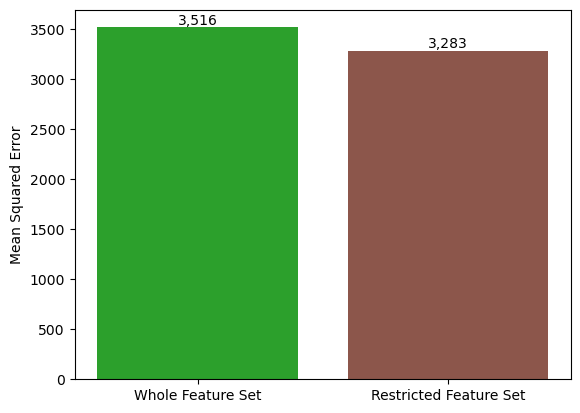

In [309]:
# We will create a simple plot to compare the Mean Squared Error from each model prediction 
# Our MSE from the restricted feature set is actually smaller than from the entire feature set

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

labels = ['Whole Feature Set', 'Restricted Feature Set']
data = [MSE, mse_rel]
bar_colors = ['tab:green', 'tab:brown']

bar_data = ax.bar(labels, data, color=bar_colors)

ax.set_ylabel('Mean Squared Error')
ax.bar_label(bar_data, fmt='{:,.0f}')

plt.show()

#### Our testing indicates that the simpler linear regression model using just the statistically significant features yields a smaller MSE than in our base case. 